In [1]:
import pandas as pd


data = {
    "complaint_text": [
        "I was charged an overdraft fee even though I had money in my account.",
        "The loan officer misled me about my mortgage terms.",
        "My credit card payment was posted late and I got a penalty.",
        "Customer service was rude and unhelpful.",
        "The bank closed my account without warning.",
        "I received calls every day about a debt I do not owe.",
        "They promised me 0% APR but I was charged interest.",
        "The app keeps crashing when I try to make a payment.",
        "My check was held for over 10 days without reason.",
        "Unauthorized transactions appeared on my account.",
        "The interest rate was increased without any notice.",
        "I was denied a loan even though I meet all requirements.",
        "They keep sending me offers I never requested.",
        "The online portal is extremely slow and confusing.",
        "I was charged for a late fee even though I paid on time.",
        "Fraudulent activity was not resolved by the bank.",
        "They keep losing my documents and asking again.",
        "The credit bureau reported incorrect information.",
        "Customer support keeps transferring me without solving my issue.",
        "Hidden charges were applied to my account.",
        "I received a foreclosure notice without any explanation.",
        "The mobile banking app doesn’t recognize my login.",
        "They rejected my dispute claim without investigating.",
        "I was charged twice for the same transaction.",
        "The loan processing took over 3 months unnecessarily."
    ]
}

df = pd.DataFrame(data)


print(df.head(25))

df["num_chars"] = df["complaint_text"].apply(len)
df["num_words"] = df["complaint_text"].apply(lambda x: len(x.split()))

print(df[["complaint_text", "num_chars", "num_words"]].head(25))


                                       complaint_text
0   I was charged an overdraft fee even though I h...
1   The loan officer misled me about my mortgage t...
2   My credit card payment was posted late and I g...
3            Customer service was rude and unhelpful.
4         The bank closed my account without warning.
5   I received calls every day about a debt I do n...
6   They promised me 0% APR but I was charged inte...
7   The app keeps crashing when I try to make a pa...
8   My check was held for over 10 days without rea...
9   Unauthorized transactions appeared on my account.
10  The interest rate was increased without any no...
11  I was denied a loan even though I meet all req...
12     They keep sending me offers I never requested.
13  The online portal is extremely slow and confus...
14  I was charged for a late fee even though I pai...
15  Fraudulent activity was not resolved by the bank.
16    They keep losing my documents and asking again.
17  The credit bureau report

In [5]:


import nltk

# Download resources for all versions
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")  # <-- new required one


# Tokenization + POS tagging
df["tokens_nltk"] = df["complaint_text"].apply(word_tokenize)
df["pos_tags"] = df["tokens_nltk"].apply(pos_tag)

# Count POS tag frequencies
pos_counts = Counter()
for tags in df["pos_tags"]:
    for _, tag in tags:
        pos_counts[tag] += 1

print("Top POS tags (NLTK):")
print(pos_counts.most_common(10))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Top POS tags (NLTK):
[('NN', 50), ('.', 25), ('VBD', 23), ('PRP', 22), ('DT', 21), ('IN', 19), ('JJ', 12), ('RB', 11), ('PRP$', 11), ('VBN', 10)]


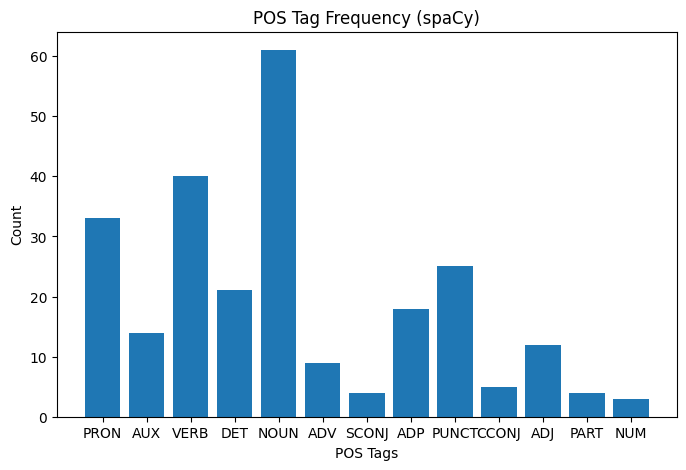

In [6]:
import spacy
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")


df["doc_spacy"] = df["complaint_text"].apply(nlp)


df["verbs"] = df["doc_spacy"].apply(lambda doc: [token.text for token in doc if token.pos_ == "VERB"])
df["adjectives"] = df["doc_spacy"].apply(lambda doc: [token.text for token in doc if token.pos_ == "ADJ"])


pos_freq_spacy = Counter()
for doc in df["doc_spacy"]:
    pos_freq_spacy.update([token.pos_ for token in doc])


plt.figure(figsize=(8,5))
plt.bar(pos_freq_spacy.keys(), pos_freq_spacy.values())
plt.title("POS Tag Frequency (spaCy)")
plt.xlabel("POS Tags")
plt.ylabel("Count")
plt.show()


In [7]:
import re

texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https://example.com for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]

cleaned = []
for t in texts:

    t = re.sub(r"\+?\d[\d\-\s]{8,}\d", " ", t)
    # Remove emails
    t = re.sub(r"\b[\w\.-]+?@\w+?\.\w+?\b", " ", t)

    t = re.sub(r"http\S+|www\.\S+", " ", t)

    t = re.sub(r"[^A-Za-z0-9\s]", " ", t)

    t = re.sub(r"\s+", " ", t).strip()
    cleaned.append(t)

for before, after in zip(texts, cleaned):
    print(f"Before: {before}\nAfter : {after}\n")


Before: My phone number is 1234567890 and my email is test@domain.com
After : My phone number is and my email is

Before: Visit https://example.com for more info!!!
After : Visit for more info

Before: HELLO!!! This is SOOOOO exciting :))
After : HELLO This is SOOOOO exciting

Before: Contact us at info@company.org or call +91 98765-43210
After : Contact us at or call

Before: Python's regex is very useful!!!  #Coding #Fun
After : Python s regex is very useful Coding Fun

